In [40]:
%run qboot

## Majorana Chain

In [41]:
L = 4
H = sum(1j*maj(i)@maj((i+1)%L) for i in range(L))
H

i χ0 χ1 +i χ1 χ2 +i χ2 χ3 -i χ0 χ3

In [42]:
base = OperatorSpace([maj()]+[maj(i) for i in range(L)])
base

OperatorSpace([I, χ0, χ1, χ2, χ3])

In [43]:
ope = base.ope()
ope

OperatorSpace([[I, χ0, χ1, χ2, χ3],
               [χ0, I, χ0 χ1, χ0 χ2, χ0 χ3],
               [χ1, - χ0 χ1, I, χ1 χ2, χ1 χ3],
               [χ2, - χ0 χ2, - χ1 χ2, I, χ2 χ3],
               [χ3, - χ0 χ3, - χ1 χ3, - χ2 χ3, I]])

In [44]:
full = base.extend(ope).hermitianize()
full

OperatorSpace([I, χ0, χ1, χ2, χ3, i χ0 χ1, i χ0 χ2, i χ0 χ3, i χ1 χ2,
               i χ1 χ3, i χ2 χ3])

In [45]:
eqs = full.adjoint(H)
eqs

Operators([0, 2 χ1 -2 χ3, -2 χ0 +2 χ2, -2 χ1 +2 χ3, 2 χ0 -2 χ2,
           2i χ1 χ3 +2i χ0 χ2, 2i χ1 χ2 +2i χ2 χ3 +2i χ0 χ3 -2i χ0 χ1,
           2i χ1 χ3 -2i χ0 χ2, -2i χ0 χ2 +2i χ1 χ3,
           -2i χ0 χ3 -2i χ0 χ1 -2i χ1 χ2 +2i χ2 χ3, -2i χ1 χ3 -2i χ0 χ2])

In [46]:
null = full.solve(eqs.append(maj())).round(10)
null

OperatorSpace([0.71i χ0 χ3 -0.71i χ1 χ2, -0.71 χ0 -0.71 χ2,
               -0.71 χ1 -0.71 χ3, -0.71i χ0 χ1 -0.71i χ2 χ3])

In [47]:
b = null.represent(H)
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)

In [48]:
E, x = SDP(b, C, As)
E, x

(-1.999999999966929,
 array([ 7.07106781e-01, -3.38952795e-33, -8.47576470e-33,  7.07106781e-01]))

In [49]:
full.represent(maj()) + x @ full.represent(null) 

array([ 1.0000000e+00,  2.3967582e-33,  5.9932707e-33,  2.3967582e-33,
        5.9932707e-33, -5.0000000e-01,  0.0000000e+00,  5.0000000e-01,
       -5.0000000e-01,  0.0000000e+00, -5.0000000e-01])

## Single-Site Interaction

Consider $H=-(c_1 c_2 c_3 c_4+\text{h.c.})$, where
$$c_a=\frac{1}{2}(\chi_{2a}+\mathrm{i}\chi_{2a+1})$$

In [1]:
%run qboot

In [2]:
def c(a):
    return (maj(2*a) + 1j*maj(2*a+1))/2

In [3]:
H = -(c(0)@c(1)@c(2)@c(3)).real
H

-0.06 χ0 χ2 χ4 χ6 +0.06 χ0 χ2 χ5 χ7 +0.06 χ0 χ3 χ4 χ7 +0.06 χ0 χ3 χ5 χ6 +0.06 χ1 χ2 χ4 χ7 +0.06 χ1 χ2 χ5 χ6 +0.06 χ1 χ3 χ4 χ6 -0.06 χ1 χ3 χ5 χ7

In [514]:
base = OperatorSpace([maj()]).extend(Operators(H.generators()),3)
base = base.real - base.imag
base.size

93

In [466]:
ope = base.ope()
ope.shape

(93, 93)

In [469]:
full = OperatorSpace(ope.basis())
full = full.real - full.imag
full.size

247

In [470]:
from itertools import combinations
SU4 = [(c(a).H@c(b)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

1729

In [471]:
null = full.solve(eqs.append(maj())).round(10)
null.size

3

In [472]:
b = null.represent(H)
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((3,), (93, 93), (3, 93, 93))

In [473]:
E, x = SDP(b, C, As)
E, x

(-0.49999999990523736, array([0.96346322, 3.23568875, 1.61308925]))

The $x.A$ matrix has no null space. It seems not possible to further reduce the base space dimension.

In [504]:
rndx = numpy.random.randn(3)
A = numpy.tensordot(rndx, As, axes=([0],[0]))
scipy.linalg.null_space(A)

array([], shape=(93, 0), dtype=complex128)

In [505]:
import matplotlib.pyplot as plt

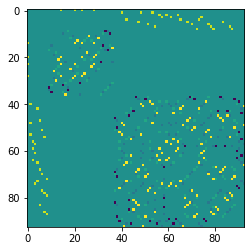

In [506]:
plt.imshow(A.real)

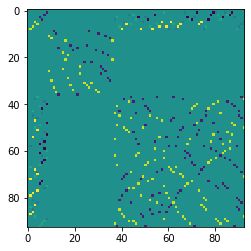

In [507]:
plt.imshow(A.imag)

If base space is reduced, the result can be off.

In [328]:
base = OperatorSpace([maj()]+list(H.generators())+list(null.basis()))
base = base.hermitianize()
base.size

31

In [329]:
ope = base.ope()
ope.shape

(31, 31)

In [330]:
b = null.represent(H)
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((3,), (31, 31), (3, 31, 31))

In [331]:
E, x = SDP(b, C, As)
E, x

(-0.24999999755562052, array([-1.30719106, -0.69755212,  1.14222943]))

Manually asign a set of base operators

In [34]:
from itertools import combinations
ops = [maj()]
for n in range(1,5):
    for comb in combinations(range(4),n):
        op = opprod([c(i) for i in comb])
        ops.append(op.real)
        ops.append(op.imag)
base = OperatorSpace(ops).orth()
base.size

31

In [35]:
ope = base.ope()
ope.shape

(31, 31)

In [36]:
full = OperatorSpace(ope.basis())
full = full.real - full.imag
full.size

256

In [37]:
from itertools import combinations
SU4 = [(c(a).H@c(b)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

1792

In [38]:
null = full.solve(eqs.append(maj())).round(10)
null.size

4

In [39]:
b = null.represent(H)
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((4,), (31, 31), (4, 31, 31))

In [40]:
E, x = SDP(b, C, As)
E, x

(-1129.7706545119186,
 array([-14949605.3280426 ,  -6701351.25922313,  -3187726.56749587,
          -196494.56809162]))

## Two-Fermion Model

Consider a two-site system with four complex fermion modes per site. Define complex fermion operator ($i=0,1$, $a=0,1,2,3$)
$$c_{i,a}=\frac{1}{2}(\chi_{8i+2a} + \mathrm{i}\chi_{8i+2a+1})$$

In [515]:
%run qboot

In [516]:
def c(i, a):
    return (maj(8*i+2*a) + 1j*maj(8*i+2*a+1))/2

In [517]:
H0 = sum(c(1,a).H@c(0,a) for a in range(4)).real
Hint = -sum(c(i,0)@c(i,1)@c(i,2)@c(i,3) for i in range(2)).real
H = H0 + Hint
H

-0.25i χ1 χ8 +0.25i χ0 χ9 -0.25i χ3 χ10 +0.25i χ2 χ11 -0.25i χ5 χ12 +0.25i χ4 χ13 -0.25i χ7 χ14 +0.25i χ6 χ15 -0.06 χ0 χ2 χ4 χ6 +0.06 χ0 χ2 χ5 χ7 +0.06 χ0 χ3 χ4 χ7 +0.06 χ0 χ3 χ5 χ6 +0.06 χ1 χ2 χ4 χ7 +0.06 χ1 χ2 χ5 χ6 +0.06 χ1 χ3 χ4 χ6 -0.06 χ1 χ3 χ5 χ7 -0.06 χ8 χ10 χ12 χ14 +0.06 χ8 χ10 χ13 χ15 +0.06 χ8 χ11 χ12 χ15 +0.06 χ8 χ11 χ13 χ14 +0.06 χ9 χ10 χ12 χ15 +0.06 χ9 χ10 χ13 χ14 +0.06 χ9 χ11 χ12 χ14 -0.06 χ9 χ11 χ13 χ15

In [521]:
base = OperatorSpace([maj()]).extend(Operators(H.generators()),3)
base = base.real - base.imag
base.size

697

In [522]:
ope = base.ope()
ope.shape

(697, 697)

In [523]:
full = OperatorSpace(ope.basis())
full = full.real - full.imag
full.size

14893

In [526]:
from itertools import combinations
SU4 = [sum(c(i,a).H@c(i,b) for i in range(2)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

104251

In [ ]:
null = full.solve(eqs.append(maj())).round(10)
null.size

In [230]:
b = null.represent(H)
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.35354482,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0024613 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.0024613 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.35354482,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.0024613 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.0024613 ,  0.        ,  0.        ,  0. 

In [ ]:
E, x = SDP(b, C, As)
E, x